In [1]:
print("all ok")

all ok


In [2]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)
response=llm.invoke("what is length of wall of china?")

In [3]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.\n\nWait, I think they used advanced technology like GPS and satellites to measure it more a

In [4]:
response.content

"<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of miles, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. For example, if you include all the branches and sections, it might add up to a longer distance. But if you just take the main wall, it might be shorter. I think the Chinese government did a survey a while back, so that might be a reliable source.\n\nWait, I think they used advanced technology like GPS and satellites to measure it more accurately. That wo

In [5]:
from langchain.tools import tool

## this is my custom tools

In [11]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

## importing the inbuilt tool

In [7]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [8]:
search.invoke("what is the latest update on iphone17 release?")

"Some iPhone 17 models (maybe even all of them) will have a new camera bump, a wide rectangular raised area that stretches across the phone similar in style to Google's Pixel line. According to a ... The iPhone 17 lineup brings significant technological improvements across design, performance, and functionality. Apple's latest innovations focus on enhanced displays, powerful processing capabilities, and advanced camera systems.. Innovative Design and Display. The iPhone 17 Pro Max features a larger 6.86-inch display, marking a notable size increase. Planned for September 2025, the iPhone 17 models could feature larger display sizes, ProMotion across the lineup, Wi-Fi 7, and more. We're still in the middle of the iPhone 16 release cycle, but ... New iPhone 17 colors. Rumors of a new color for the iPhone started in April, when Twitter user and leaker Majin Bu (not the Dragon Ball Z character) posted that the iPhone 17 Pro and Pro Max could ... • The iPhone 17's display may not match what

In [ ]:
# !pip install duckduckgo_search


In [12]:
tools=[multiply, add, divide, search]

In [13]:
llm_with_tools=llm.bind_tools(tools)

In [ ]:
response=llm_with_tools.invoke("hi")

In [16]:
response.content

'Hello! How can I assist you today?'

In [17]:
response.tool_calls

[]

In [18]:
response=llm_with_tools.invoke("what is 2+2?")

In [19]:
response.content

''

In [20]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'jffg9v5qq',
  'type': 'tool_call'}]

In [21]:
response=llm_with_tools.invoke("what is 10/2?")

In [22]:
response.content

''

In [23]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': '5cy4q3eke',
  'type': 'tool_call'}]

In [24]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [27]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '0r3shn8vw', 'function': {'arguments': '{"query":"TATA Group founding year"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 417, 'prompt_tokens': 402, 'total_tokens': 819, 'completion_time': 1.680069816, 'prompt_time': 0.032320324, 'queue_time': 0.057850386000000004, 'total_time': 1.7123901400000001}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--77a0d434-e99a-42e7-8eb0-6b8b84656663-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'TATA Group founding year'}, 'id': '0r3shn8vw', 'type': 'tool_call'}], usage_metadata={'input_tokens': 402, 'output_tokens': 417, 'total_tokens': 819})

In [ ]:
response.content

''

In [26]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA Group founding year'},
  'id': '0r3shn8vw',
  'type': 'tool_call'}]

In [32]:
def function_1(state:MessagesState):
    pass

In [33]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [34]:
builder=StateGraph(MessagesState)

In [ ]:
builder.add_node("llm_decision_step",function_1)

In [36]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001F268978160>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001F246D88AF0>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000001F268978280>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [37]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [38]:
builder.add_edge(START,"llm_decision_step")

In [41]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)


In [42]:
builder.add_edge("tools","llm_decision_step")

In [43]:
react_graph=builder.compile()

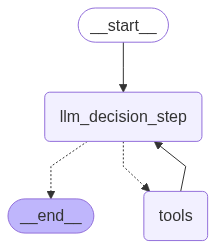

In [44]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))